## TEAM-EDINBURGH


Project Title - The Indian Start-Up Case

* Context

The data for this project spans from 2018-2019. Our goal will be to satisfy the processes for handling the data and also provide a detailed analysis of the process using the CRISP-DM data analysis framework.

This Notebook will include conclusions on the following :

* Asking the relevant questions and stating some hypothesis.
* Cleaning the data.

Questions?

* Do companies in certain sectors tend to receive more funding than others?

* Is there a correlation between the stage of development of a company and the amount of funding it receives?

* Are companies with more founders more likely to receive larger amounts of funding?

* Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

* Does the number of investors in a company tend to impact the amount of funding it receives?

* Founders: How many founders are associated with each company? What is the average number of founders?

* What are the top 10 companies with the highest funding?


Hypothesis! 

* Startups in the e-commerce and fintech sectors receive more funding compared to other sectors in India.

* There is a positive correlation between the stage of development of a company and the amount of funding it receives in India.

* Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

* Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.

* The number of investors in a company is positively correlated with the amount of funding it receives in India.

* Is there a relationship between the sector of a company and the amount of funding it receives?

* Is there a difference in the average funding received by companies headquartered in different regions?

## Importing libraries & accessing the size and shape of the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ind_2018 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\Indian Start-up Project\\startup_funding2018.csv')
ind_2019 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2019.csv')
ind_2020 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2020.csv')
ind_2021 = pd.read_csv('C:\\Users\\GILBERT\\Downloads\\DAP2\\Indian Start-up Project\\startup_funding2021.csv')

In [3]:
ind_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
ind_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [5]:
ind_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## Filtering the data ,replacing and rename values & a date series(random)

In [6]:
ind_2018['Year']=2018
ind_2018['Founded']='NaN'
ind_2018= ind_2018.rename(columns={'Company Name': 'Company/Brand'})
ind_2018= ind_2018.rename(columns={'Industry': 'Sector'})
ind_2018= ind_2018.rename(columns={'Location': 'HeadQuarter'})
ind_2018= ind_2018.rename(columns={'Amount': 'Amount($)'})
ind_2018= ind_2018.rename(columns={'Round/Series': 'Stage'})
ind_2018.drop('About Company',axis=1,inplace=True)

In [7]:
# replace empty values with NaN
ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\2826083760.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2018['Sector'].replace('—', pd.np.nan, inplace=True)


In [8]:
ind_2018.loc[58, 'Sector'] = 'Entertainment'
ind_2018.loc[105, 'Sector'] = 'Finance'
ind_2018.loc[121, 'Sector'] = 'Automotive'
ind_2018.loc[146, 'Sector'] = 'Automotive'
ind_2018.loc[153, 'Sector'] = 'Food'
ind_2018.loc[174, 'Sector'] = 'Technology'
ind_2018.loc[181, 'Sector'] = 'Finance'
ind_2018.loc[210, 'Sector'] = 'Automotive'
ind_2018.loc[230, 'Sector'] = 'Real Estate'
ind_2018.loc[235, 'Sector'] = 'Technology'
ind_2018.loc[238, 'Sector'] = 'Technology'
ind_2018.loc[242, 'Sector'] = 'Real Estate'
ind_2018.loc[243, 'Sector'] = 'Technology'
ind_2018.loc[247, 'Sector'] = 'Technology'
ind_2018.loc[251, 'Sector'] = 'Wellness'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[258, 'Sector'] = 'Marketing'
ind_2018.loc[259, 'Sector'] = 'E-Commerce'
ind_2018.loc[257, 'Sector'] = 'Marketing'
ind_2018.loc[294, 'Sector'] = 'Transportation'
ind_2018.loc[325, 'Sector'] = 'Technology'
ind_2018.loc[326, 'Sector'] = 'Finance'
ind_2018.loc[346, 'Sector'] = 'Finance'
ind_2018.loc[398, 'Sector'] = 'Finance'
ind_2018.loc[457, 'Sector'] = 'Agriculture'
ind_2018.loc[472, 'Sector'] = 'Technology'
ind_2018.loc[473, 'Sector'] = 'Technology'
ind_2018.loc[476, 'Sector'] = 'Technology'
ind_2018.loc[478, 'Sector'] = 'Wellness/Beauty'
ind_2018.loc[480, 'Sector'] = 'Hospitality'
ind_2018.loc[510, 'Sector'] = 'Technology'

In [9]:
ind_2018.head(511)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN
...,...,...,...,...,...,...,...
506,Verzeo,E-Learning,Series A,5000000,"Bangalore, Karnataka, India",2018,NaN
507,Haazri,"Food and Beverage, Snack Food, Tea",Seed,"₹12,500,000","Mumbai, Maharashtra, India",2018,NaN
508,Connect India,"Delivery Service, E-Commerce, Logistics",Angel,—,"New Delhi, Delhi, India",2018,NaN
509,Flyrobe,"Fashion, Lifestyle, Rental",Series B,"₹264,000,000","Mumbai, Maharashtra, India",2018,NaN


In [10]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

## Filling the anomalies in this column by containing the valid values and replacing the missing values

In [11]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2018['Date'] = np.random.choice(date_range, size=len(ind_2018))

ind_2018 = ind_2018.sort_values('Date')

ind_2018['Date'] = pd.to_datetime(ind_2018['Date'], format='%Y-%m-%d')


In [12]:
ind_2018.set_index('Date',inplace=True)

## Changing the shape of the amount col & currency(rates conidered),filling the missing values with mean of the column.

In [13]:
def convert_to_dollars(value):
    if pd.isnull(value):
        return np.nan
    elif isinstance(value, float):
        return str(value)
    elif '$' in value:
        return value
    elif '₹' in value:
        return '$' + str(round(float(value.split('₹')[1].replace(',', '')) / 68.44, 2))
    else:
        return '$' + str(float(value) / 68.44)


# convert values in 'Amount($)' column to strings
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(str)

ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')

ind_2018['Amount($)'].replace('', np.nan, inplace=True)

ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(float)

ind_2018['Amount($)'] = ind_2018['Amount($)'].apply(convert_to_dollars)


C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\4169188906.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2018['Amount($)'] = ind_2018['Amount($)'].str.replace('[^\d\.]', '')


In [14]:
# # convert the 'Amount' column to a numeric data type
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])
ind_2018['Amount($)'] = pd.to_numeric(ind_2018['Amount($)'])

In [15]:
ind_2018.describe()

,Amount($),Year
count,3.780000e+02,526.0
mean,2.391683e+08,2018.0
std,1.374900e+09,0.0
min,7.500000e+03,2018.0
25%,1.000000e+06,2018.0
50%,5.800000e+06,2018.0
75%,5.000000e+07,2018.0
max,2.000000e+10,2018.0


In [16]:
ind_2018.duplicated()

Date
2018-01-01    False
2018-01-01    False
2018-01-01    False
2018-01-02    False
2018-01-02    False
              ...  
2018-12-29    False
2018-12-29    False
2018-12-29    False
2018-12-30    False
2018-12-30    False
Length: 526, dtype: bool

In [17]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)        148
HeadQuarter        0
Year               0
Founded            0
dtype: int64

In [18]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Eupheus Learning,"E-Learning, EdTech, Education",Seed,NaN,"Delhi, Delhi, India",2018,NaN
2018-01-01,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,NaN,"Ghaziabad, Uttar Pradesh, India",2018,NaN
2018-01-01,Locus.sh,"Big Data, Data Visualization, Logistics, Software",Series A,4000000.0,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Emflux Motors,"Automotive, Electric Vehicle, Energy",Seed,364846.0,"Bengaluru, Karnataka, India",2018,NaN
2018-01-02,Urban Ladder,"E-Commerce, E-Commerce Platforms, Furniture, H...",Debt Financing,5600000.0,"Bangalore, Karnataka, India",2018,NaN


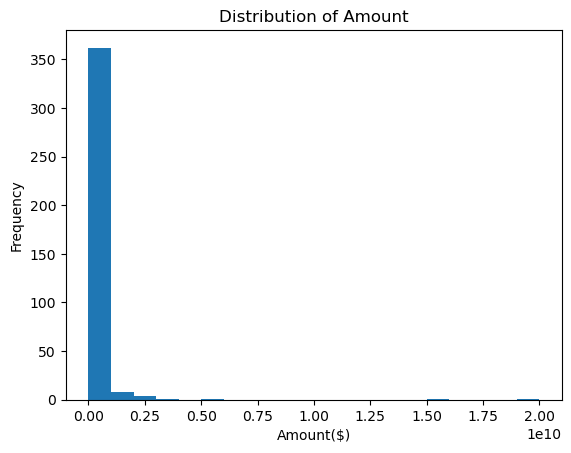

In [19]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2018['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [20]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].fillna(ind_2018['Amount($)'].median())

In [21]:
ind_2018['Amount($)'] = ind_2018['Amount($)'].astype(int)

In [22]:
ind_2018.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
Founded          0
dtype: int64

In [23]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Eupheus Learning,"E-Learning, EdTech, Education",Seed,5800000,"Delhi, Delhi, India",2018,NaN
2018-01-01,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,5800000,"Ghaziabad, Uttar Pradesh, India",2018,NaN
2018-01-01,Locus.sh,"Big Data, Data Visualization, Logistics, Software",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Emflux Motors,"Automotive, Electric Vehicle, Energy",Seed,364846,"Bengaluru, Karnataka, India",2018,NaN
2018-01-02,Urban Ladder,"E-Commerce, E-Commerce Platforms, Furniture, H...",Debt Financing,5600000,"Bangalore, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-14,Forum for Innovation Incubation Research and E...,"Funding Platform, Incubators, Non Profit",Grant,102500000,"Margão, Goa, India",2018,NaN
2018-03-15,Poshmiles Online Solutions Private Limited,Travel,Seed,5800000,"Bengaluru, Karnataka, India",2018,NaN
2018-03-15,Twenty Two Motors,"Automotive, Battery, Electric Vehicle, Manufac...",Corporate Round,65000000,"Haryana, Haryana, India",2018,NaN


## Replacing missing values in stage & Founded col / filtering headquater col / filtering the sector col by closing them in related col by using str.contain

In [24]:
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

ind_2018.loc[~ind_2018['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [25]:
mode_value = ind_2018['Stage'].mode()[0]
print(mode_value)

Seed


In [26]:
ind_2018['Stage'] = ind_2018['Stage'].fillna(ind_2018['Stage'].mode()[0])
ind_2018['Founded'] = ind_2018['Founded'].replace('NaN', np.nan)

In [27]:
ind_2018.head(100)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded
Date,,,,,,,
2018-01-01,Eupheus Learning,"E-Learning, EdTech, Education",Seed,5800000,"Delhi, Delhi, India",2018,NaN
2018-01-01,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,5800000,"Ghaziabad, Uttar Pradesh, India",2018,NaN
2018-01-01,Locus.sh,"Big Data, Data Visualization, Logistics, Software",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN
2018-01-02,Emflux Motors,"Automotive, Electric Vehicle, Energy",Seed,364846,"Bengaluru, Karnataka, India",2018,NaN
2018-01-02,Urban Ladder,"E-Commerce, E-Commerce Platforms, Furniture, H...",Seed,5600000,"Bangalore, Karnataka, India",2018,NaN
...,...,...,...,...,...,...,...
2018-03-14,Forum for Innovation Incubation Research and E...,"Funding Platform, Incubators, Non Profit",Grant,102500000,"Margão, Goa, India",2018,NaN
2018-03-15,Poshmiles Online Solutions Private Limited,Travel,Seed,5800000,"Bengaluru, Karnataka, India",2018,NaN
2018-03-15,Twenty Two Motors,"Automotive, Battery, Electric Vehicle, Manufac...",Corporate Round,65000000,"Haryana, Haryana, India",2018,NaN


In [28]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
HeadQuarter        0
Year               0
Founded          526
dtype: int64

In [29]:
# Split the Headquarters column by comma, and keep only the first value
ind_2018["City"] = ind_2018["HeadQuarter"].apply(lambda x: x.split(",")[0])

In [30]:
ind_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,Founded,City
Date,,,,,,,,
2018-01-01,Eupheus Learning,"E-Learning, EdTech, Education",Seed,5800000,"Delhi, Delhi, India",2018,NaN,Delhi
2018-01-01,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,5800000,"Ghaziabad, Uttar Pradesh, India",2018,NaN,Ghaziabad
2018-01-01,Locus.sh,"Big Data, Data Visualization, Logistics, Software",Series A,4000000,"Bangalore, Karnataka, India",2018,NaN,Bangalore
2018-01-02,Emflux Motors,"Automotive, Electric Vehicle, Energy",Seed,364846,"Bengaluru, Karnataka, India",2018,NaN,Bengaluru
2018-01-02,Urban Ladder,"E-Commerce, E-Commerce Platforms, Furniture, H...",Seed,5600000,"Bangalore, Karnataka, India",2018,NaN,Bangalore


In [31]:
ind_2018.drop('HeadQuarter',axis=1,inplace=True)

In [32]:
ind_2018 = ind_2018.rename(columns={'City': 'HeadQuarter'})

In [33]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_2018['HeadQuarter'] = ind_2018['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')

In [34]:
ind_2018.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
dtype: int64

In [35]:
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']



ind_2018['Sector_clean'] = 'Other'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2018.loc[ind_2018['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [36]:
ind_2018.drop('Sector',axis=1,inplace=True)

In [37]:
ind_2018= ind_2018.rename(columns={'Sector_clean': 'Sector'})

In [38]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Eupheus Learning,Seed,5800000,2018,NaN,Delhi,Education
2018-01-01,Cleardekho,Venture - Series Unknown,5800000,2018,NaN,Ghaziabad,Lifestyle
2018-01-01,Locus.sh,Series A,4000000,2018,NaN,Bangalore,Logistics
2018-01-02,Emflux Motors,Seed,364846,2018,NaN,Bangalore,Energy
2018-01-02,Urban Ladder,Seed,5600000,2018,NaN,Bangalore,Real Estate


## Ploting visuals to check the shape of the dataframe

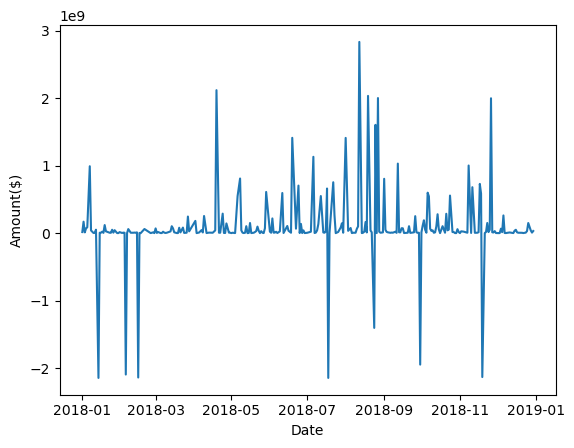

In [39]:
import seaborn as sns

# Plot a line chart of funding amounts over time
funding_over_time = ind_2018.groupby('Date')['Amount($)'].sum().reset_index()
sns.lineplot(data=funding_over_time, x='Date', y='Amount($)')
plt.show()


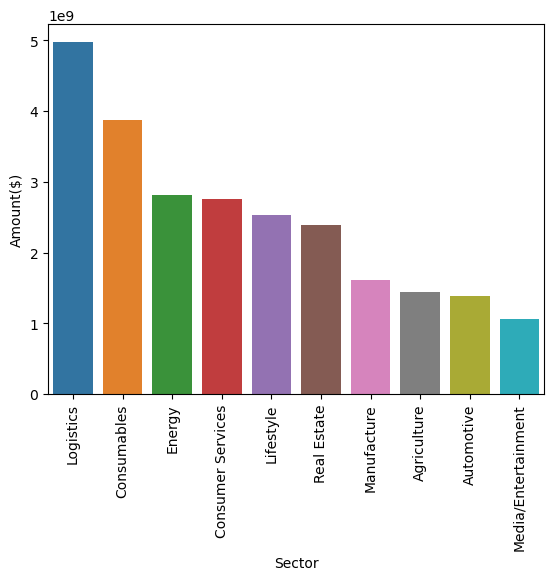

In [40]:
if ind_2018.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## Accessing the shape of the data, Filling the missing the val with statistical means,Dropping columns,Creating a date series

In [41]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [42]:
ind_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [43]:
ind_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [44]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [45]:
ind_2019.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

In [46]:
ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2019['Year']=2019

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\4162604990.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Sector'].replace('—', pd.np.nan, inplace=True)


In [47]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [48]:
ind_2019.loc[41, 'Sector'] = 'Media'
ind_2019.loc[49, 'Sector'] = 'Human Resources'
ind_2019.loc[52, 'Sector'] = 'Technology'
ind_2019.loc[56, 'Sector'] = 'Technology'
ind_2019.loc[57, 'Sector'] = 'E-Commerce'

In [49]:
ind_2019.drop('What it does',axis=1,inplace=True)

In [50]:
# # create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')

# # create a new column 'Date' with random dates within the year 2018
ind_2019['Date'] = np.random.choice(date_range, size=len(ind_2019))

ind_2019 = ind_2019.sort_values('Date')

ind_2019['Date'] = pd.to_datetime(ind_2019['Date'], format='%Y-%m-%d')

In [51]:
ind_2019.set_index('Date',inplace=True)

In [52]:
mode_value = ind_2019['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2019['HeadQuarter'].mode()[0]
print(mode_value)

mode_value = ind_2019['Stage'].mode()[0]
print(mode_value)

Vivek Gupta, Abhay Hanjura
Bangalore
Series A


In [53]:
ind_2019['HeadQuarter'] = ind_2019['HeadQuarter'].fillna(ind_2019['HeadQuarter'].mode()[0])
ind_2019['Stage'] = ind_2019['Stage'].fillna(ind_2019['Stage'].mode()[0])
ind_2019['Founders'] = ind_2019['Founders'].fillna(ind_2019['Founders'].mode()[0])

## Using Statiscal means to fill the missing values in the founded column

In [54]:
ind_2019['Founded'] = pd.to_numeric(ind_2019['Founded'], errors='coerce')

In [55]:
ind_2019['Founded'] = ind_2019['Founded'].fillna(0)

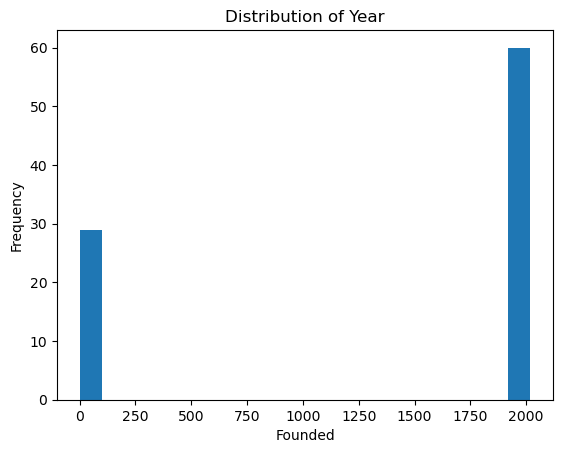

In [56]:
plt.hist(ind_2019['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [57]:
ind_2019['Founded'].replace(0, np.nan, inplace=True)

In [58]:
ind_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)         0
Stage             0
Year              0
dtype: int64

In [59]:
ind_2019['Founded'].fillna(ind_2019['Founded'].median(), inplace=True)

In [60]:
ind_2019['Founded'] = ind_2019['Founded'].astype(int)

## Restructuring the shape of the column & using statistical means to fill them, Restructuring the name convention of the sector column by containing it in a list of substrings and assigning it to name. 

In [61]:
ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\1514532099.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2019['Amount($)'].replace('', pd.np.nan, inplace=True)


In [62]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\661071711.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2019['Amount($)'] = ind_2019['Amount($)'].str.replace('[^\d\.]', '')


In [63]:
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])
ind_2019['Amount($)'] = pd.to_numeric(ind_2019['Amount($)'])

In [64]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-01,Afinoz,2015,Noida,Fintech,Rachna Suneja,Fintech innovation lab,NaN,Series A,2019
2019-01-05,LivFin,2017,Delhi,Fintech,Rakesh Malhotra,German development finance institution DEG,5000000.0,Series A,2019
2019-01-07,Euler Motors,2015,Delhi,Automotive tech,Saurav Kumar,"Blume Ventures, Emergent Ventures",2000000.0,Series A,2019
2019-01-11,Open Secret,2015,Bangalore,Food tech,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,Series A,2019
2019-01-13,Ola,2010,Bangalore,Transportation,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000.0,Series A,2019


In [65]:
ind_2019.isna().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
Sector            0
Founders          0
Investor          0
Amount($)        12
Stage             0
Year              0
dtype: int64

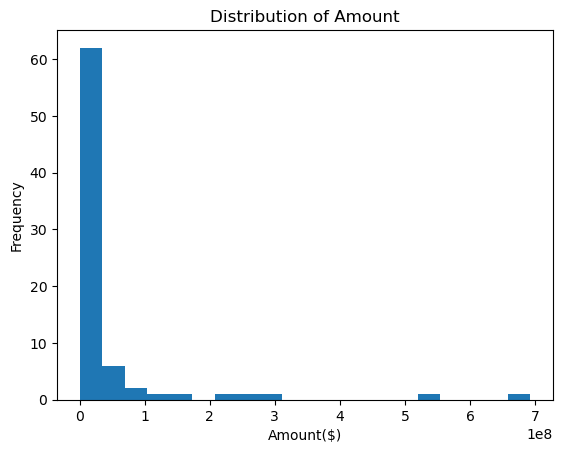

In [66]:
# Create a histogram of the 'Amount' column
plt.hist(ind_2019['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

In [67]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].fillna(ind_2019['Amount($)'].median())

In [68]:
ind_2019['Amount($)'] = ind_2019['Amount($)'].astype(int)

In [69]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2019-01-01,Afinoz,2015,Noida,Fintech,Rachna Suneja,Fintech innovation lab,6000000,Series A,2019
2019-01-05,LivFin,2017,Delhi,Fintech,Rakesh Malhotra,German development finance institution DEG,5000000,Series A,2019
2019-01-07,Euler Motors,2015,Delhi,Automotive tech,Saurav Kumar,"Blume Ventures, Emergent Ventures",2000000,Series A,2019
2019-01-11,Open Secret,2015,Bangalore,Food tech,"Ahana Gautam, Udit Kejriwal",Matrix Partners,6000000,Series A,2019
2019-01-13,Ola,2010,Bangalore,Transportation,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000,Series A,2019


In [70]:
ind_2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [71]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2019['Sector_clean'] = 'Other'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2019.loc[ind_2019['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [72]:
ind_2019.drop('Sector',axis=1,inplace=True)

In [73]:
ind_2019= ind_2019.rename(columns={'Sector_clean': 'Sector'})

In [74]:
ind_2019.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2019-01-01,Afinoz,2015,Noida,Rachna Suneja,Fintech innovation lab,6000000,Series A,2019,FinTech
2019-01-05,LivFin,2017,Delhi,Rakesh Malhotra,German development finance institution DEG,5000000,Series A,2019,FinTech
2019-01-07,Euler Motors,2015,Delhi,Saurav Kumar,"Blume Ventures, Emergent Ventures",2000000,Series A,2019,Automotive
2019-01-11,Open Secret,2015,Bangalore,"Ahana Gautam, Udit Kejriwal",Matrix Partners,6000000,Series A,2019,Consumables
2019-01-13,Ola,2010,Bangalore,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000,Series A,2019,Logistics


## Ploting Visuals to check the shape of the dataframe

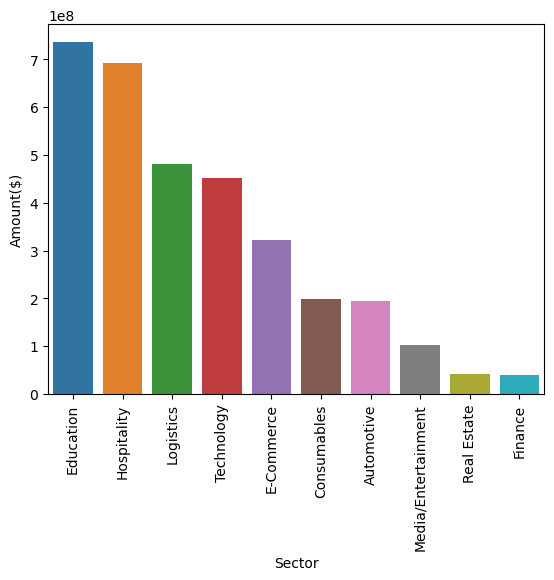

In [75]:
if ind_2019.empty:
    print("No data found for the year 2019")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2019.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


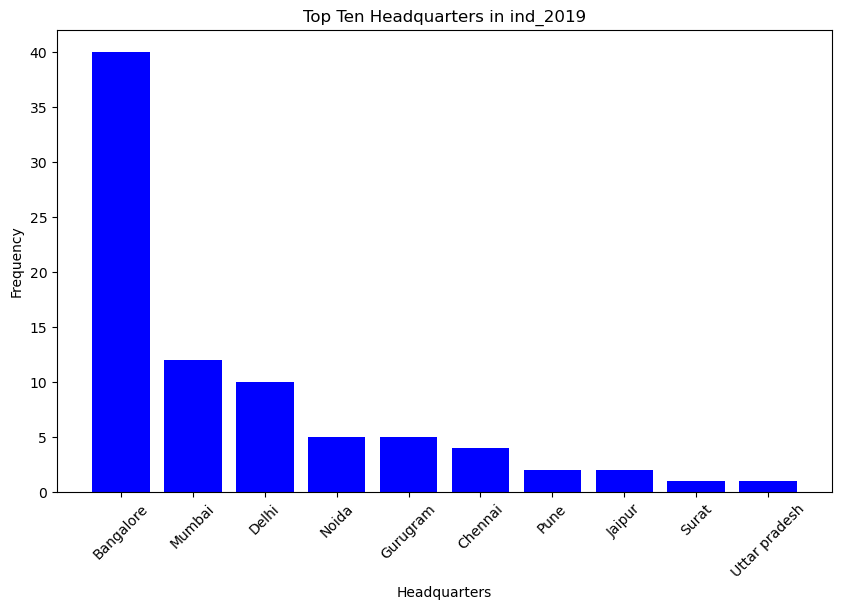

In [76]:
# Get the top ten headquarters
top_ten_hq = ind_2019['HeadQuarter'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_hq.index, top_ten_hq.values, color='blue')
plt.title('Top Ten Headquarters in ind_2019')
plt.xlabel('Headquarters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Checking the shape of the data,Replace missing values and dropping,adding a date series

In [77]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [78]:
ind_2020.describe()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
count,1055,843,961,1042,1055,1043,1017,1052,591,2
unique,905,27,77,302,990,927,848,309,42,2
top,Nykaa,2015,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Undisclosed,Series A,Pre-Seed
freq,6,136,317,80,4,6,20,243,96,1


In [79]:
ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2020['Year']=2020

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\1812708846.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Sector'].replace('—', pd.np.nan, inplace=True)


In [80]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [81]:
ind_2020.loc[518, 'Sector'] = 'E-Commerce'
ind_2020.loc[569, 'Sector'] = 'E-Commerce'
ind_2020.loc[687, 'Sector'] = 'Social Work'
ind_2020.loc[699, 'Sector'] = 'Beauty&Wellness'
ind_2020.loc[707, 'Sector'] = 'E-Commerce'
ind_2020.loc[732, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[763, 'Sector'] = 'E-Commerce'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'
ind_2020.loc[809, 'Sector'] = 'Technology'
ind_2020.loc[918, 'Sector'] = 'Fintech'
ind_2020.loc[926, 'Sector'] = 'Real Estate'
ind_2020.loc[1012, 'Sector'] = 'Technology'
ind_2020.loc[1031, 'Sector'] = 'Technology'
ind_2020.loc[746, 'Sector'] = 'E-Commerce'

In [82]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
Year                0
dtype: int64

In [83]:
ind_2020.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1055, dtype: bool

In [84]:
ind_2020.drop_duplicates(inplace=True)

In [85]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2020['Date'] = np.random.choice(date_range, size=len(ind_2020))

ind_2020 = ind_2020.sort_values('Date')

ind_2020['Date'] = pd.to_datetime(ind_2020['Date'], format='%Y-%m-%d')

In [86]:
ind_2020.set_index('Date',inplace=True)

## Filling & replacing val in the HQ col using dictionary then filling in missing values for dif col, using substrings to alter some rows

In [87]:
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]

new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)


In [88]:
ind_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector              0
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             462
Unnamed: 9       1050
Year                0
dtype: int64

In [89]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,"ERPNext is an Open Source, Online ERP solution...",Rushabh Mehta,Rainmatter,"$1,000,000",NaN,NaN,2020
2020-01-01,Byju's,2011,Bangalore,EdTech,Provides online learning classes,Byju Raveendran,DST Global,"$122,000,000",NaN,NaN,2020
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,Sells its organic and beauty products via mark...,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal","$150,000",NaN,NaN,2020
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",NaN,NaN,2020
2020-01-02,Simsim,NaN,Bangalore,Social Commerce,It enables community opinion influencers to se...,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital","$8,000,000",Series B,NaN,2020


In [90]:
mode_value = ind_2020['Founders'].mode()[0]
print(mode_value)

mode_value = ind_2020['Stage'].mode()[0]
print(mode_value)

mode_value = ind_2020['Investor'].mode()[0]
print(mode_value)

mode_value = ind_2020['HeadQuarter'].mode()[0]
print(mode_value)

Byju Raveendran
Series A
Venture Catalysts
Bangalore


In [91]:
ind_2020['Founders'] = ind_2020['Founders'].fillna(ind_2020['Founders'].mode()[0])
ind_2020['Stage'] = ind_2020['Stage'].fillna(ind_2020['Stage'].mode()[0])
ind_2020['Investor'] = ind_2020['Investor'].fillna(ind_2020['Investor'].mode()[0])
ind_2020['HeadQuarter'] = ind_2020['HeadQuarter'].fillna(ind_2020['HeadQuarter'].mode()[0])

In [92]:
seedr = ['seed round','Seed round','Seed Round',]
preser= ['Pre Series A','Pre series A','Pre-series A','Pre-Series A']

ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(seedr)), 'Stage'] = 'Seed Round'
ind_2020.loc[ind_2020['Stage'].str.contains('|'.join(preser)), 'Stage'] = 'Pre-series A'

In [93]:
ind_2020['Founded'] = pd.to_numeric(ind_2020['Founded'], errors='coerce')

ind_2020['Founded'] = ind_2020['Founded'].fillna(0)

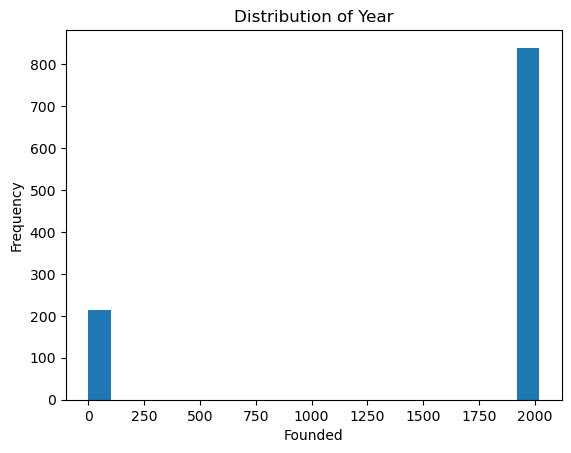

In [94]:
plt.hist(ind_2020['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

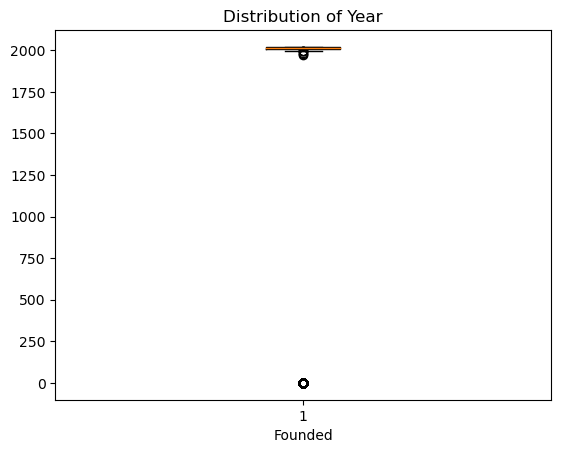

In [95]:
plt.boxplot(ind_2020['Founded'].dropna())
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.show()

In [96]:
ind_2020['Founded'].replace(0, np.nan, inplace=True)

In [97]:
ind_2020['Founded'].fillna(ind_2020['Founded'].median(), inplace=True)

ind_2020['Founded'] = ind_2020['Founded'].astype(int)

In [98]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Year
Date,,,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,"ERPNext is an Open Source, Online ERP solution...",Rushabh Mehta,Rainmatter,"$1,000,000",Series A,NaN,2020
2020-01-01,Byju's,2011,Bangalore,EdTech,Provides online learning classes,Byju Raveendran,DST Global,"$122,000,000",Series A,NaN,2020
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,Sells its organic and beauty products via mark...,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal","$150,000",Series A,NaN,2020
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",Series A,NaN,2020
2020-01-02,Simsim,2016,Bangalore,Social Commerce,It enables community opinion influencers to se...,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital","$8,000,000",Series B,NaN,2020


In [99]:
ind_2020.drop('What it does',axis=1,inplace=True)

In [100]:
ind_2020.drop('Unnamed: 9',axis=1,inplace=True)

In [101]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        3
Stage            0
Year             0
dtype: int64

In [102]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,Rushabh Mehta,Rainmatter,"$1,000,000",Series A,2020
2020-01-01,Byju's,2011,Bangalore,EdTech,Byju Raveendran,DST Global,"$122,000,000",Series A,2020
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal","$150,000",Series A,2020
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus","$2,000,000",Series A,2020
2020-01-02,Simsim,2016,Bangalore,Social Commerce,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital","$8,000,000",Series B,2020
2020-01-03,Seal Professional,2012,Bangalore,Edtech,Byju Raveendran,Equanimity Ventures,Undisclosed,Pre-series A,2020
2020-01-03,HealthPlix,2016,Bangalore,Healthtech,"Raghuraj Sunder Raju, Prasad Basavaraj, Sandee...","JSW Ventures, Chiratae Ventures, Kalaari Capital","$6,000,000",Series B,2020
2020-01-03,AnalytIQSports's SuperCric,2019,Bangalore,Entertainment,"Suhail Chandhok, Arvind Sivdas, Dhanya Param",Venture Catalysts,Undisclosed,Series A,2020
2020-01-03,Callido Learning,2016,Mumbai,Edtech,Sriram Subramanian,Education Catalyst Fund,Undisclosed,Series A,2020


## Converting the structure of the amt col,filling missing val with stats data,creating a substring to structure the sector column

In [103]:
ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)
ind_2020['Amount($)'] = ind_2020['Amount($)'].replace('undisclosed', np.nan)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\4231441892.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2020['Amount($)'].replace('', pd.np.nan, inplace=True)


In [104]:
# if it is not already a string, convert it to string
if ind_2020['Amount($)'].dtype != 'object':
    ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')

ind_2020['Amount($)'] = pd.to_numeric(ind_2020['Amount($)'])

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\2403162787.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2020['Amount($)'] = ind_2020['Amount($)'].str.replace('[^\d\.]', '')


In [105]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,Rushabh Mehta,Rainmatter,1000000.0,Series A,2020
2020-01-01,Byju's,2011,Bangalore,EdTech,Byju Raveendran,DST Global,122000000.0,Series A,2020
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal",150000.0,Series A,2020
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000.0,Series A,2020
2020-01-02,Simsim,2016,Bangalore,Social Commerce,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital",8000000.0,Series B,2020


In [106]:
ind_2020['Amount($)'] = ind_2020['Amount($)'].fillna(0)

In [107]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

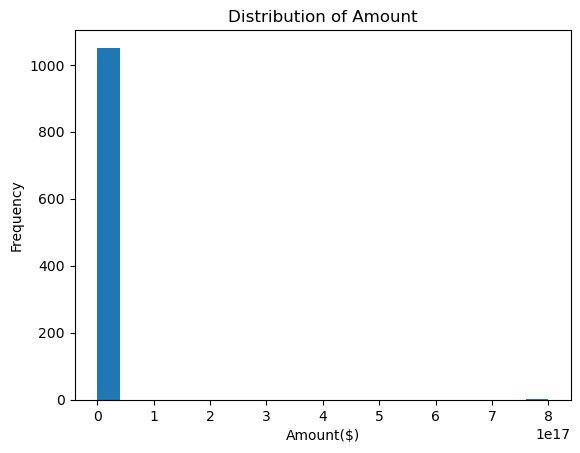

In [108]:
plt.hist(ind_2020['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

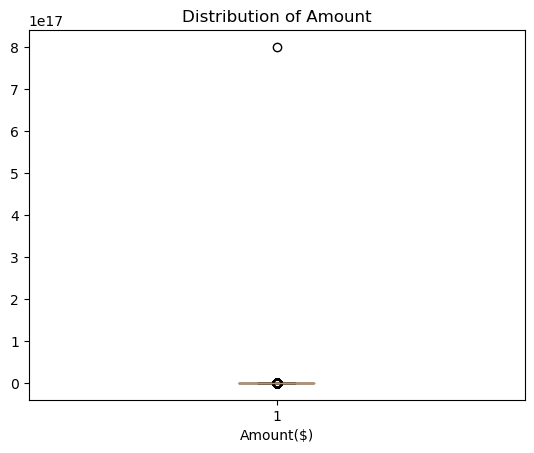

In [109]:
plt.boxplot(ind_2020['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [110]:
ind_2020['Amount($)'].replace(0, np.nan, inplace=True)

In [111]:
ind_2020.isna().sum()

Company/Brand      0
Founded            0
HeadQuarter        0
Sector             0
Founders           0
Investor           0
Amount($)        247
Stage              0
Year               0
dtype: int64

In [112]:
ind_2020['Amount($)'].fillna(ind_2020['Amount($)'].median(), inplace=True)

ind_2020['Amount($)'] = ind_2020['Amount($)'].astype(int)

In [113]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year
Date,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,Rushabh Mehta,Rainmatter,1000000,Series A,2020
2020-01-01,Byju's,2011,Bangalore,EdTech,Byju Raveendran,DST Global,122000000,Series A,2020
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal",150000,Series A,2020
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020
2020-01-02,Simsim,2016,Bangalore,Social Commerce,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital",8000000,Series B,2020


In [114]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG','Beverage']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2020['Sector_clean'] = 'Other'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2020.loc[ind_2020['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [115]:
ind_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Sector_clean
Date,,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Tech company,Rushabh Mehta,Rainmatter,1000000,Series A,2020,Technology
2020-01-01,Byju's,2011,Bangalore,EdTech,Byju Raveendran,DST Global,122000000,Series A,2020,Education
2020-01-02,Tattva,2018,Delhi,Beauty & wellness,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal",150000,Series A,2020,Wellness/Beauty
2020-01-02,Genius Teacher,2016,Mumbai,Edtech,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020,Education
2020-01-02,Simsim,2016,Bangalore,Social Commerce,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital",8000000,Series B,2020,E-Commerce


In [116]:
ind_2020.drop('Sector',axis=1,inplace=True)

In [117]:
ind_2020= ind_2020.rename(columns={'Sector_clean': 'Sector'})

In [118]:
ind_2020.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

In [119]:
ind_2020.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2020-01-01,ERPNext,2008,Mumbai,Rushabh Mehta,Rainmatter,1000000,Series A,2020,Technology
2020-01-01,Byju's,2011,Bangalore,Byju Raveendran,DST Global,122000000,Series A,2020,Education
2020-01-02,Tattva,2018,Delhi,"Megha Wadhwa, Karnesh Mahendru","Sukhbir Singh, Rakhee Singal",150000,Series A,2020,Wellness/Beauty
2020-01-02,Genius Teacher,2016,Mumbai,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000,Series A,2020,Education
2020-01-02,Simsim,2016,Bangalore,Amit Bagaria,"Accel Partners, Shunwei Capital, Good Capital",8000000,Series B,2020,E-Commerce
2020-01-03,Seal Professional,2012,Bangalore,Byju Raveendran,Equanimity Ventures,3000000,Pre-series A,2020,Education
2020-01-03,HealthPlix,2016,Bangalore,"Raghuraj Sunder Raju, Prasad Basavaraj, Sandee...","JSW Ventures, Chiratae Ventures, Kalaari Capital",6000000,Series B,2020,Healthcare
2020-01-03,AnalytIQSports's SuperCric,2019,Bangalore,"Suhail Chandhok, Arvind Sivdas, Dhanya Param",Venture Catalysts,3000000,Series A,2020,Media/Entertainment
2020-01-03,Callido Learning,2016,Mumbai,Sriram Subramanian,Education Catalyst Fund,3000000,Series A,2020,Education


## Ploting visuals to check the dataframe shape

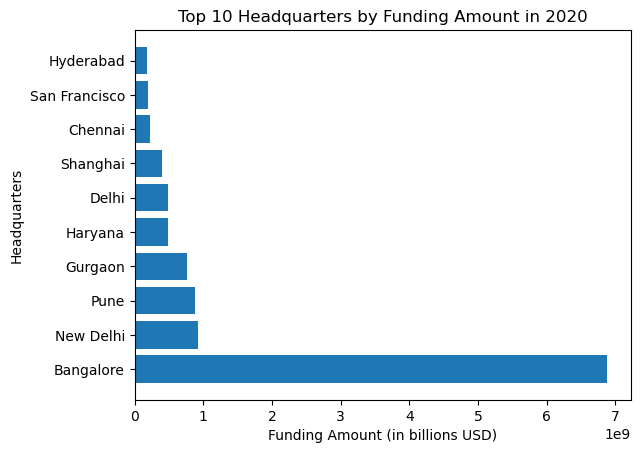

In [120]:
top10_hq = ind_2020.groupby('HeadQuarter')['Amount($)'].sum().sort_values(ascending=False)[:10]

plt.barh(top10_hq.index, top10_hq.values)
plt.title('Top 10 Headquarters by Funding Amount in 2020')
plt.xlabel('Funding Amount (in billions USD)')
plt.ylabel('Headquarters')
plt.show()

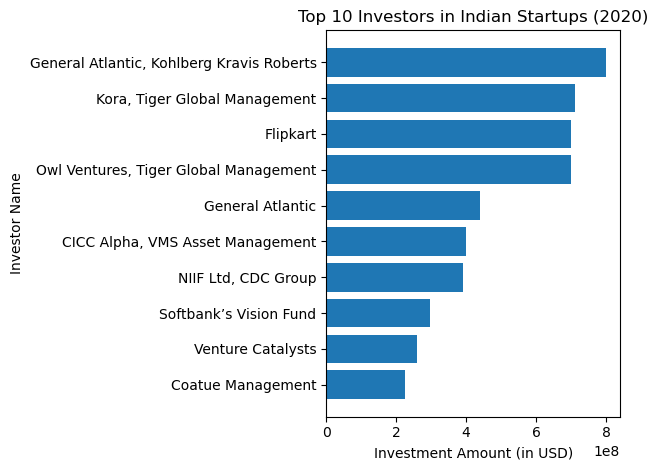

In [121]:
top10_investors = ind_2020.groupby('Investor')['Amount($)'].sum().nlargest(10)

plt.barh(top10_investors.index[::-1], top10_investors.values[::-1])
plt.xlabel('Investment Amount (in USD)')
plt.ylabel('Investor Name')
plt.title('Top 10 Investors in Indian Startups (2020)')
plt.tight_layout()
plt.show()

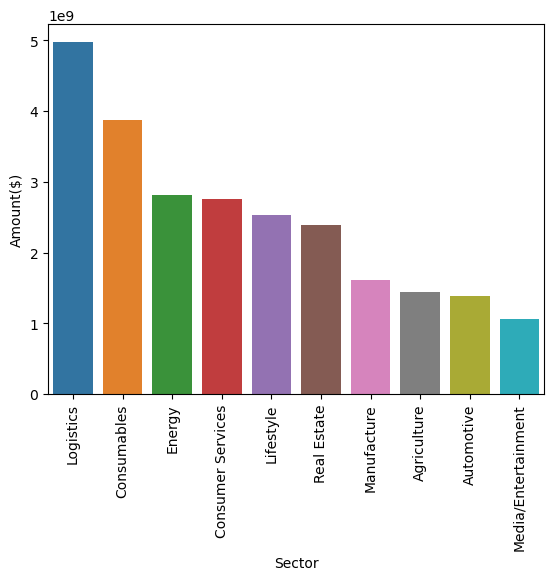

In [122]:
if ind_2020.empty:
    print("No data found for the year 2018")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2018.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


## checking the data shape / filling missing values/ creating a date series

In [123]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [124]:
ind_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [125]:
ind_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [126]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [127]:
# replace empty values with NaN
ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)

ind_2021['Year']=2021

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\2320037695.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Sector'].replace('—', pd.np.nan, inplace=True)


In [128]:
ind_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
Year               0
dtype: int64

In [129]:
# create a DatetimeIndex with dates for the entire year
date_range = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# create a new column 'Date' with random dates within the year 2018
ind_2021['Date'] = np.random.choice(date_range, size=len(ind_2021))

ind_2021 = ind_2021.sort_values('Date')

ind_2021['Date'] = pd.to_datetime(ind_2021['Date'], format='%Y-%m-%d')


## mask to identify rows where the 'Stage' column contains a dollar sign and assigns the value in that row to the 'Amount column,drop specific rows by their index number and assign 'NaN' values 

In [130]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
1170,Lido Learning,2019.0,Mumbai,E-learning,LIDO is an ed-tech company revolutionizing fo...,Sahil Sheth,Unilazer Ventures,$10000000,NaN,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,Wingreens Farms is a fully integrated (farm to...,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,NaN,2021,2021-01-02
368,SATYA MicroCapital,2017.0,New Delhi,FinTech,Satya MicroCapital is a micro finance company ...,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company","$20,000,000",NaN,2021,2021-01-02
148,Xpresslane,2019.0,Bangalore,Tech startup,Xpresslane makes checkout fast and easy. With ...,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",$400000,Pre-seed,2021,2021-01-02
609,Fable Fintech,2015.0,Mumbai,FinTech,Fable Fintech is being seed-funded by the CCAv...,Naushad Contractor,Paytm,$Undisclosed,Series A,2021,2021-01-02
168,Miko,2015.0,Mumbai,Consumer Electronics,Miko is an advanced robotics startup founded b...,"Sneh R Vaswani, Prashant V Iyengar, Chintan S ...","IIFL AMC, Mankind Pharma Family Office, Aroa V...",$28000000,NaN,2021,2021-01-03
628,Leverage Edu,2017.0,New Delhi,EdTech,AI-enabled marketplace designed to help studen...,Akshay Chaturvedi,"Trifecta Capital Advisors, Blume Ventures",$2000000,Debt,2021,2021-01-03
930,Koparo,2020.0,New Delhi,Consumer Goods,Koparo is a direct-to-consumer brand that is a...,Simran Khara,"Saama Capital﻿, ﻿Titan Capital﻿, DSG Consumer ...",$700000,Seed,2021,2021-01-04
1021,ClearDekho,2016.0,Ghaziabad,Retail,ClearDekho is India’s Leading Affordable Eyewe...,"Saurabh Dayal, Shivi Singh",Aroa Ventures,$4000000,Pre-series A,2021,2021-01-05
42,LearnVern,2016.0,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",NaN,"$1,000,000",NaN,2021,2021-01-06


In [131]:
mask = (~ind_2021['Stage'].isna()) & ind_2021['Stage'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Stage']
ind_2021.loc[mask, 'Stage'] = ''

mask = (~ind_2021['Investor'].isna()) & ind_2021['Investor'].str.contains('\$')
ind_2021.loc[mask, 'Amount($)'] = ind_2021.loc[mask, 'Investor']
ind_2021.loc[mask, 'Investor'] = ''


ind_2021 = ind_2021.drop(111)

ind_2021 = ind_2021.drop(256)

ind_2021.loc[902, 'Investor'] = np.nan

ind_2021.loc[59, 'Investor'] = np.nan

ind_2021.loc[1100, 'Investor'] = np.nan

ind_2021.loc[1148, 'Investor'] = np.nan

In [132]:
ind_2021.head(60)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Date
1170,Lido Learning,2019.0,Mumbai,E-learning,LIDO is an ed-tech company revolutionizing fo...,Sahil Sheth,Unilazer Ventures,$10000000,NaN,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,Wingreens Farms is a fully integrated (farm to...,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,NaN,2021,2021-01-02
368,SATYA MicroCapital,2017.0,New Delhi,FinTech,Satya MicroCapital is a micro finance company ...,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company","$20,000,000",NaN,2021,2021-01-02
148,Xpresslane,2019.0,Bangalore,Tech startup,Xpresslane makes checkout fast and easy. With ...,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",$400000,Pre-seed,2021,2021-01-02
609,Fable Fintech,2015.0,Mumbai,FinTech,Fable Fintech is being seed-funded by the CCAv...,Naushad Contractor,Paytm,$Undisclosed,Series A,2021,2021-01-02
168,Miko,2015.0,Mumbai,Consumer Electronics,Miko is an advanced robotics startup founded b...,"Sneh R Vaswani, Prashant V Iyengar, Chintan S ...","IIFL AMC, Mankind Pharma Family Office, Aroa V...",$28000000,NaN,2021,2021-01-03
628,Leverage Edu,2017.0,New Delhi,EdTech,AI-enabled marketplace designed to help studen...,Akshay Chaturvedi,"Trifecta Capital Advisors, Blume Ventures",$2000000,Debt,2021,2021-01-03
930,Koparo,2020.0,New Delhi,Consumer Goods,Koparo is a direct-to-consumer brand that is a...,Simran Khara,"Saama Capital﻿, ﻿Titan Capital﻿, DSG Consumer ...",$700000,Seed,2021,2021-01-04
1021,ClearDekho,2016.0,Ghaziabad,Retail,ClearDekho is India’s Leading Affordable Eyewe...,"Saurabh Dayal, Shivi Singh",Aroa Ventures,$4000000,Pre-series A,2021,2021-01-05
42,LearnVern,2016.0,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",NaN,"$1,000,000",NaN,2021,2021-01-06


In [133]:
ind_2021['HeadQuarter'].ffill(inplace=True)

ind_2021['Stage'] = ind_2021['Stage'].fillna(ind_2021['Stage'].mode()[0])

In [134]:
mode_value = ind_2021['Investor'].mode()[0]
print(mode_value)

Inflection Point Ventures


In [135]:
ind_2021['Investor'] = ind_2021['Investor'].fillna(ind_2021['Investor'].mode()[0])

In [136]:
mode_value = ind_2021['Founders'].mode()[0]
print(mode_value)

Ashneer Grover, Shashvat Nakrani


In [137]:
ind_2021['Founders'] = ind_2021['Founders'].fillna(ind_2021['Founders'].mode()[0])

In [138]:
ind_2021.drop('What it does', axis=1,inplace=True)

## Replacing the missing values in the founded column by using Statiscal means

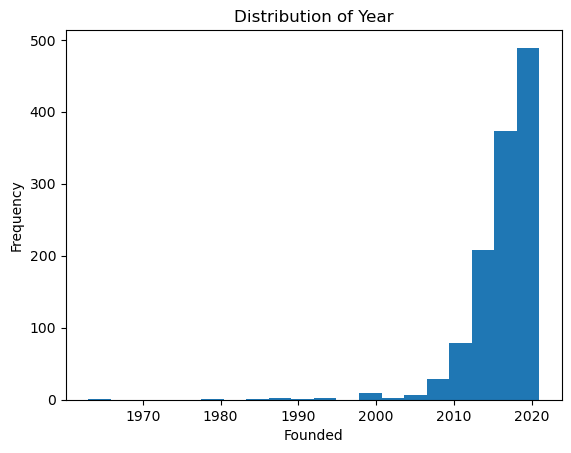

In [139]:
plt.hist(ind_2021['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [140]:
ind_2021['Founded'] = pd.to_numeric(ind_2021['Founded'], errors='coerce')

In [141]:
ind_2021['Founded'] = ind_2021['Founded'].fillna(ind_2021['Founded'].median())

In [142]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
1170,Lido Learning,2019.0,Mumbai,E-learning,Sahil Sheth,Unilazer Ventures,$10000000,Seed,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",$17000000,Seed,2021,2021-01-02
368,SATYA MicroCapital,2017.0,New Delhi,FinTech,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company","$20,000,000",Seed,2021,2021-01-02
148,Xpresslane,2019.0,Bangalore,Tech startup,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",$400000,Pre-seed,2021,2021-01-02
609,Fable Fintech,2015.0,Mumbai,FinTech,Naushad Contractor,Paytm,$Undisclosed,Series A,2021,2021-01-02
168,Miko,2015.0,Mumbai,Consumer Electronics,"Sneh R Vaswani, Prashant V Iyengar, Chintan S ...","IIFL AMC, Mankind Pharma Family Office, Aroa V...",$28000000,Seed,2021,2021-01-03
628,Leverage Edu,2017.0,New Delhi,EdTech,Akshay Chaturvedi,"Trifecta Capital Advisors, Blume Ventures",$2000000,Debt,2021,2021-01-03
930,Koparo,2020.0,New Delhi,Consumer Goods,Simran Khara,"Saama Capital﻿, ﻿Titan Capital﻿, DSG Consumer ...",$700000,Seed,2021,2021-01-04
1021,ClearDekho,2016.0,Ghaziabad,Retail,"Saurabh Dayal, Shivi Singh",Aroa Ventures,$4000000,Pre-series A,2021,2021-01-05
42,LearnVern,2016.0,Ahmadabad,EdTech,"Niral Modi, Aditi Modi",Inflection Point Ventures,"$1,000,000",Seed,2021,2021-01-06


## Filtering & replacing missing values in the the amount col, containing the sector col into categories by putting them in substrings

In [143]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        1
Stage            0
Year             0
Date             0
dtype: int64

In [144]:
# replace empty values with NaN
ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\3156858020.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ind_2021['Amount($)'].replace('', pd.np.nan, inplace=True)


In [145]:
ind_2021['Amount($)'] = ind_2021['Amount($)'].replace('undisclosed', np.nan)

In [146]:
# if it is not already a string, convert it to string
if ind_2021['Amount($)'].dtype != 'object':
    ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')

ind_2021['Amount($)'] = pd.to_numeric(ind_2021['Amount($)'])

C:\Users\GILBERT\AppData\Local\Temp\ipykernel_10380\803264993.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ind_2021['Amount($)'] = ind_2021['Amount($)'].str.replace('[^\d\.]', '')


In [147]:
# Replace NaN values with 0
ind_2021['Amount($)'] = ind_2021['Amount($)'].fillna(0)

In [148]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

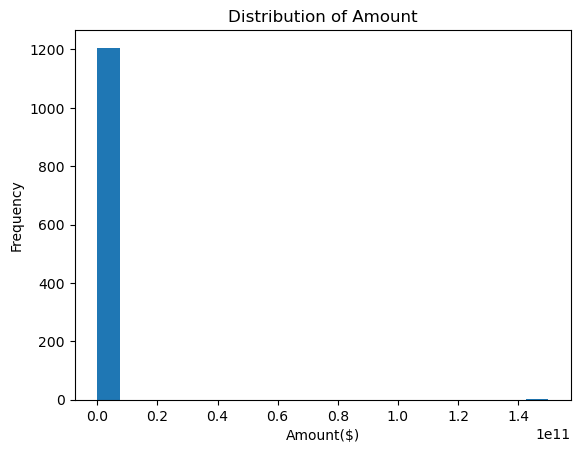

In [149]:
plt.hist(ind_2021['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

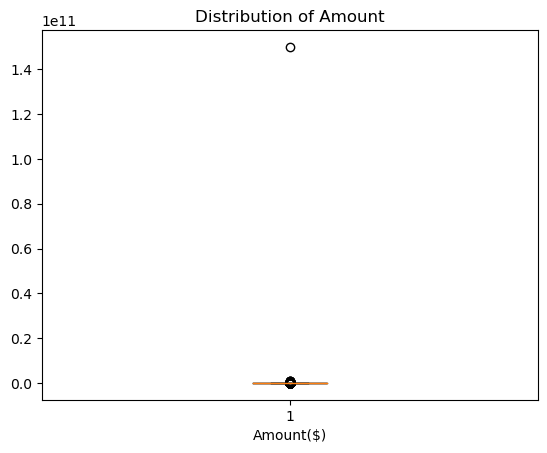

In [150]:
plt.boxplot(ind_2021['Amount($)'])
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.show()

In [151]:
ind_2021['Amount($)'].replace(0, np.nan, inplace=True)

In [152]:
# Fill missing values with median value
ind_2021['Amount($)'].fillna(ind_2021['Amount($)'].mean(), inplace=True)

ind_2021['Amount($)'] = ind_2021['Amount($)'].astype(int)

In [153]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
dtype: int64

In [154]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date
1170,Lido Learning,2019.0,Mumbai,E-learning,Sahil Sheth,Unilazer Ventures,10000000,Seed,2021,2021-01-01
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02
368,SATYA MicroCapital,2017.0,New Delhi,FinTech,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company",20000000,Seed,2021,2021-01-02
148,Xpresslane,2019.0,Bangalore,Tech startup,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",400000,Pre-seed,2021,2021-01-02
609,Fable Fintech,2015.0,Mumbai,FinTech,Naushad Contractor,Paytm,169032154,Series A,2021,2021-01-02


In [155]:
# # Create a list of substrings to search for in the Sector column
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
Game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']


ind_2021['Sector_clean'] = 'Other'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
ind_2021.loc[ind_2021['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [156]:
# replace the value in row  of Column1 with NaN & fill/replace with mode

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Food & Beverages', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Online Media#REF!', np.nan)
ind_2021.loc[98, 'HeadQuarter'] = np.nan
ind_2021.loc[1100, 'HeadQuarter'] = np.nan

ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Mountain View, CA', 'California')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')


ind_2021['HeadQuarter'] = ind_2021['HeadQuarter'].fillna(ind_2021['HeadQuarter'].mode()[0])


In [157]:
# filling the gaps with appropriate naming convention

ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')
ind_2021['Sector'] = ind_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')   
ind_2021['Sector'] = ind_2021['Sector'].replace('MoEVing is Indias only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.', 'Energy')


In [158]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Gurugram' 'New Delhi' 'Bangalore' 'Ghaziabad' 'Ahmadabad'
 'Hyderabad' 'Haryana' 'Ahmedabad' 'Chennai' 'Pune' 'Jaipur' 'Noida'
 'Kolkata' 'Powai' 'Mohali' 'Satara' 'Vadodara' 'Trivandrum' 'Rajsamand'
 'Kochi' 'Mangalore' 'Chandigarh' 'California' 'Silvassa' 'Samsitpur'
 'Panchkula' 'Thane' 'Andhra Pradesh' 'Cochin' 'Coimbatore' 'Gurgaon'
 'The Nilgiris' 'Thiruvananthapuram' 'Gandhinagar' 'Indore' 'Roorkee'
 'New York' 'Goa' 'Telangana' 'Panaji' 'Jodhpur' 'Gujarat' 'Nagpur'
 'Telugana' 'Manchester' 'Lucknow' 'Kottayam' 'Bhubaneswar' 'Faridabad'
 'Patna' 'Orissia' 'Kanpur' 'Ambernath' 'Andheri' 'Beijing' 'London'
 'Surat' 'Santra' 'Guwahati' 'Ranchi' 'West Bengal' 'Bhilwara' 'Jharkhand']


In [159]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Year,Date,Sector_clean
1170,Lido Learning,2019.0,Mumbai,E-learning,Sahil Sheth,Unilazer Ventures,10000000,Seed,2021,2021-01-01,Other
900,Wingreens Farms,2011.0,Gurugram,Food & Beverages,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02,Consumables
368,SATYA MicroCapital,2017.0,New Delhi,FinTech,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company",20000000,Seed,2021,2021-01-02,FinTech
148,Xpresslane,2019.0,Bangalore,Tech startup,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",400000,Pre-seed,2021,2021-01-02,Technology
609,Fable Fintech,2015.0,Mumbai,FinTech,Naushad Contractor,Paytm,169032154,Series A,2021,2021-01-02,FinTech


In [160]:
ind_2021.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Date             0
Sector_clean     0
dtype: int64

In [161]:
ind_2021.drop(ind_2021.columns[-8], axis=1,inplace=True)

In [162]:
ind_2021= ind_2021.rename(columns={'Sector_clean': 'Sector'})

In [163]:
ind_2021['Founded'] = ind_2021['Founded'].astype(int)

In [164]:
ind_2021.head()

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Date,Sector
1170,Lido Learning,2019,Mumbai,Sahil Sheth,Unilazer Ventures,10000000,Seed,2021,2021-01-01,Other
900,Wingreens Farms,2011,Gurugram,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000,Seed,2021,2021-01-02,Consumables
368,SATYA MicroCapital,2017,New Delhi,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company",20000000,Seed,2021,2021-01-02,FinTech
148,Xpresslane,2019,Bangalore,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",400000,Pre-seed,2021,2021-01-02,Technology
609,Fable Fintech,2015,Mumbai,Naushad Contractor,Paytm,169032154,Series A,2021,2021-01-02,FinTech


In [165]:
ind_2021.set_index('Date',inplace=True)

## Ploting visuals to check the shape of the dataframe

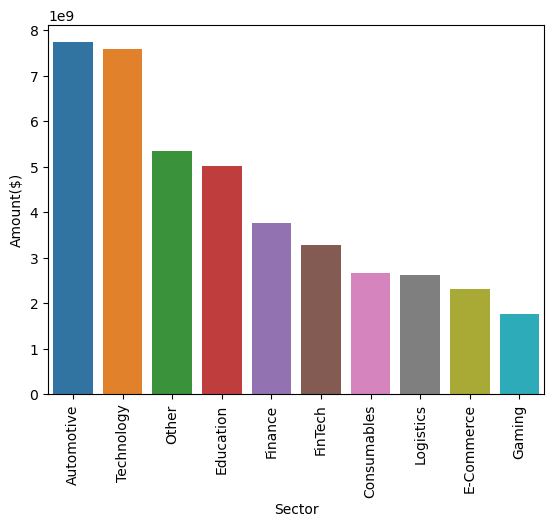

In [166]:
if ind_2021.empty:
    print("No data found for the year 2021")
else:
    # Calculate the total funding by sector
    total_funding_by_sector = ind_2021.groupby('Sector')['Amount($)'].sum().reset_index()

    top_10_sectors = total_funding_by_sector.sort_values(by='Amount($)', ascending=False).head(10)

    ax = sns.barplot(data=top_10_sectors, x='Sector', y='Amount($)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


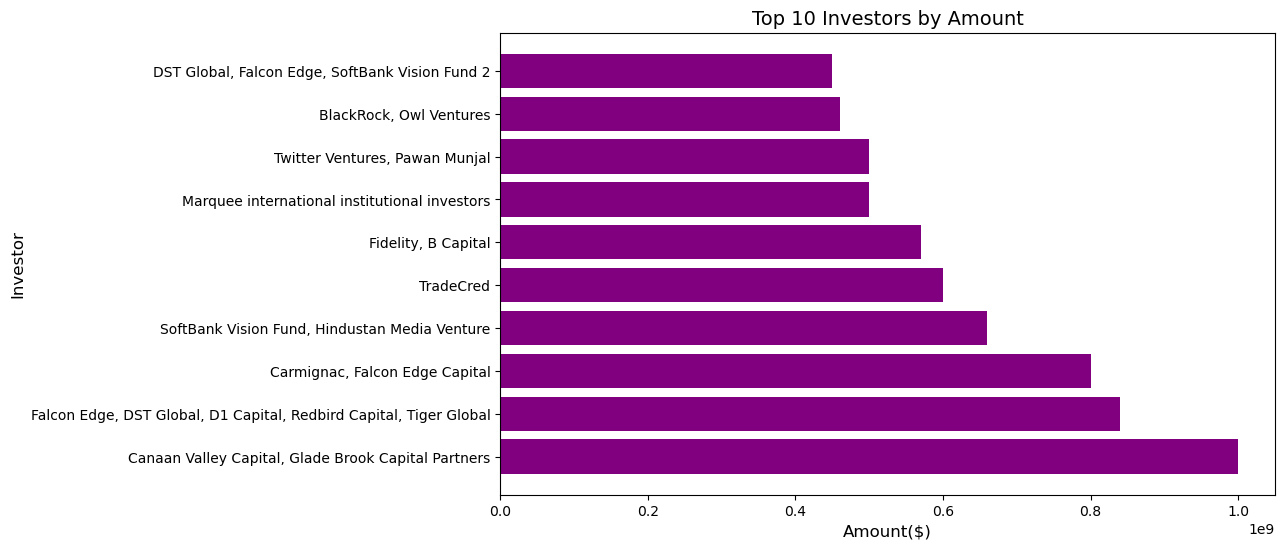

In [167]:
# sort the dataframe by amount in descending order and select the top 10 investors
top_investors = ind_2021.sort_values(by='Amount($)', ascending=False).head(10)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')

ax.set_xlabel('Amount($)', fontsize=12)

ax.set_ylabel('Investor', fontsize=12)

ax.set_title('Top 10 Investors by Amount', fontsize=14)

plt.show()

## filling missing values in 2018 with merged data, checking the correlation,converting amount col to float

In [168]:
# Compute the correlation matrix
combined_ind = pd.concat([ind_2019, ind_2020, ind_2021], axis=0)

correlation_matrix = combined_ind.corr()

print(correlation_matrix)

            Founded  Amount($)      Year
Founded    1.000000   0.038671  0.151788
Amount($)  0.038671   1.000000  0.110487
Year       0.151788   0.110487  1.000000


In [169]:
ind_2018.isna().sum()

Company/Brand      0
Stage              0
Amount($)          0
Year               0
Founded          526
HeadQuarter        0
Sector             0
dtype: int64

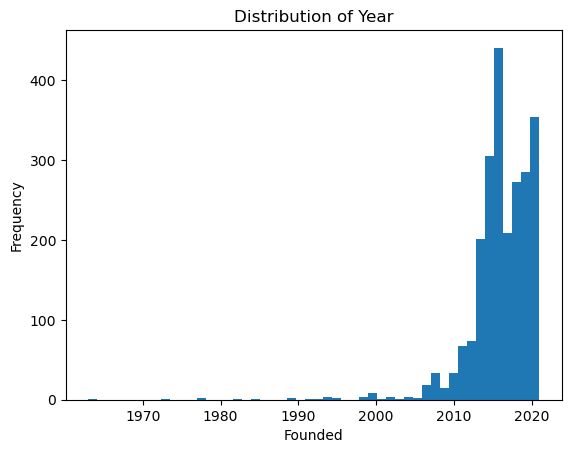

In [170]:
plt.hist(combined_ind['Founded'], bins=50)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [171]:
# Calculate the median of the column
median_value = combined_ind['Founded'].median()

In [172]:
ind_2018['Founded'].fillna(median_value, inplace=True)

In [173]:
ind_2018.isna().sum()

Company/Brand    0
Stage            0
Amount($)        0
Year             0
Founded          0
HeadQuarter      0
Sector           0
dtype: int64

In [174]:
ind_2018['Founded'] = ind_2018['Founded'].astype(int)

In [175]:
ind_2018.head()

,Company/Brand,Stage,Amount($),Year,Founded,HeadQuarter,Sector
Date,,,,,,,
2018-01-01,Eupheus Learning,Seed,5800000,2018,2016,Delhi,Education
2018-01-01,Cleardekho,Venture - Series Unknown,5800000,2018,2016,Ghaziabad,Lifestyle
2018-01-01,Locus.sh,Series A,4000000,2018,2016,Bangalore,Logistics
2018-01-02,Emflux Motors,Seed,364846,2018,2016,Bangalore,Energy
2018-01-02,Urban Ladder,Seed,5600000,2018,2016,Bangalore,Real Estate


In [176]:
ind_2018["Amount($)"] = ind_2018["Amount($)"].astype(float)

ind_2019["Amount($)"] = ind_2019["Amount($)"].astype(float)

ind_2020["Amount($)"] = ind_2020["Amount($)"].astype(float)

ind_2021["Amount($)"] = ind_2021["Amount($)"].astype(float)

In [177]:
ind_2021.head(50)

,Company/Brand,Founded,HeadQuarter,Founders,Investor,Amount($),Stage,Year,Sector
Date,,,,,,,,,
2021-01-01,Lido Learning,2019,Mumbai,Sahil Sheth,Unilazer Ventures,10000000.0,Seed,2021,Other
2021-01-02,Wingreens Farms,2011,Gurugram,"Anju C Srivastava, Arjun Srivastava","Investcorp, Omidyar Network",17000000.0,Seed,2021,Consumables
2021-01-02,SATYA MicroCapital,2017,New Delhi,Vivek Tiwari,"BlueOrchard Finance S A, Gojo & Company",20000000.0,Seed,2021,FinTech
2021-01-02,Xpresslane,2019,Bangalore,Ashwin Koorakula,"Point One Capital, Yatra Angel Network (YAN), ...",400000.0,Pre-seed,2021,Technology
2021-01-02,Fable Fintech,2015,Mumbai,Naushad Contractor,Paytm,169032154.0,Series A,2021,FinTech
2021-01-03,Miko,2015,Mumbai,"Sneh R Vaswani, Prashant V Iyengar, Chintan S ...","IIFL AMC, Mankind Pharma Family Office, Aroa V...",28000000.0,Seed,2021,Consumer Services
2021-01-03,Leverage Edu,2017,New Delhi,Akshay Chaturvedi,"Trifecta Capital Advisors, Blume Ventures",2000000.0,Debt,2021,Education
2021-01-04,Koparo,2020,New Delhi,Simran Khara,"Saama Capital﻿, ﻿Titan Capital﻿, DSG Consumer ...",700000.0,Seed,2021,Consumer Services
2021-01-05,ClearDekho,2016,Ghaziabad,"Saurabh Dayal, Shivi Singh",Aroa Ventures,4000000.0,Pre-series A,2021,Consumer Services


## Some more data cleaning in the HeadQuarter column

In [178]:
# concatenate all the dataframes into one
ind_st2 = pd.concat([ind_2018, ind_2019, ind_2020, ind_2021], ignore_index=True)

In [179]:
# Replace "Bangalore City" with "Bangalore" and "New Delhi" with "Delhi" in the DataFrame
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].replace({'Bangalore City': 'Bangalore', 'New Delhi': 'Delhi'})

In [180]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
ind_st2['HeadQuarter'] = ind_st2['HeadQuarter'].str.replace('Bombay', 'Mumbai')

In [181]:
ind_st2['Stage'] = ind_st2['Stage'].fillna(ind_st2['Stage'].mode()[0])

In [182]:
# Drop rows with the value "Sochcast" in the "Company/Brand" column in-place
ind_2021.drop(ind_2021[ind_2021['Company/Brand'] == 'Sochcast'].index, inplace=True)

In [183]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Gurugram' 'New Delhi' 'Bangalore' 'Ghaziabad' 'Ahmadabad'
 'Hyderabad' 'Haryana' 'Ahmedabad' 'Chennai' 'Pune' 'Jaipur' 'Noida'
 'Kolkata' 'Powai' 'Mohali' 'Satara' 'Vadodara' 'Trivandrum' 'Rajsamand'
 'Kochi' 'Mangalore' 'Chandigarh' 'California' 'Silvassa' 'Samsitpur'
 'Panchkula' 'Thane' 'Andhra Pradesh' 'Cochin' 'Coimbatore' 'Gurgaon'
 'The Nilgiris' 'Gandhinagar' 'Indore' 'Roorkee' 'New York' 'Goa'
 'Telangana' 'Panaji' 'Jodhpur' 'Gujarat' 'Nagpur' 'Telugana' 'Manchester'
 'Lucknow' 'Kottayam' 'Bhubaneswar' 'Faridabad' 'Patna' 'Orissia' 'Kanpur'
 'Ambernath' 'Andheri' 'Beijing' 'London' 'Surat' 'Santra' 'Guwahati'
 'Ranchi' 'West Bengal' 'Bhilwara' 'Jharkhand']


In [184]:
unique_values = ind_st2['HeadQuarter'].unique()
print(unique_values)

['Delhi' 'Ghaziabad' 'Bangalore' 'Haryana' 'Gurgaon' 'Mumbai' 'India'
 'Andheri' 'Coimbatore' 'Chennai' 'Hyderabad' 'Jaipur' 'Kolkata' 'Pune'
 'Guntur' 'Indore' 'Noida' 'Kormangala' 'Chandigarh' 'Margão' 'Thane'
 'Ernakulam' 'Azadpur' 'Kanpur' 'Kochi' 'Bhopal' 'Worli' 'Anand' 'Kota'
 'Ahmedabad' 'Mohali' 'Powai' 'Kalpakkam' 'Guindy' 'Kalkaji' 'Trivandrum'
 'Hubli' 'Faridabad' 'Belgaum' 'Lucknow' 'Jodhpur' 'Alleppey' 'Alwar'
 'Mylapore' 'Cochin' 'Kannur' 'Uttar Pradesh' 'Uttar pradesh' 'Gurugram'
 'Surat' 'Telangana' 'Rajasthan' 'Warangal' 'Sydney' 'Rajastan' 'London'
 'Karnataka' 'Kerala' 'Texas' 'San Francisco' 'Dehradun' 'New York'
 'France' 'Goa' 'Seattle' 'California' 'Bangaldesh' 'Seoul' 'Jawa Barat'
 'Paris' 'Banglore' 'Tamil Nadu' 'San Ramon' 'Gujarat' 'Singapore' 'Patna'
 'Milano' 'Bangkok' 'Berlin' 'Bengaluru' 'Newcastle' 'Riyadh' 'Hyderebad'
 'Odisha' 'Biphar' 'Ludhiana' 'Shanghai' 'Bihar' 'Jiaxing'
 'San Franciscao' 'Queensland' 'Tamilnadu' 'Ahmadabad' 'Satara' 'Vadodara'
 '

In [185]:
unique_values = ind_2021['HeadQuarter'].unique()
print(unique_values)

['Mumbai' 'Gurugram' 'New Delhi' 'Bangalore' 'Ghaziabad' 'Ahmadabad'
 'Hyderabad' 'Haryana' 'Ahmedabad' 'Chennai' 'Pune' 'Jaipur' 'Noida'
 'Kolkata' 'Powai' 'Mohali' 'Satara' 'Vadodara' 'Trivandrum' 'Rajsamand'
 'Kochi' 'Mangalore' 'Chandigarh' 'California' 'Silvassa' 'Samsitpur'
 'Panchkula' 'Thane' 'Andhra Pradesh' 'Cochin' 'Coimbatore' 'Gurgaon'
 'The Nilgiris' 'Gandhinagar' 'Indore' 'Roorkee' 'New York' 'Goa'
 'Telangana' 'Panaji' 'Jodhpur' 'Gujarat' 'Nagpur' 'Telugana' 'Manchester'
 'Lucknow' 'Kottayam' 'Bhubaneswar' 'Faridabad' 'Patna' 'Orissia' 'Kanpur'
 'Ambernath' 'Andheri' 'Beijing' 'London' 'Surat' 'Santra' 'Guwahati'
 'Ranchi' 'West Bengal' 'Bhilwara' 'Jharkhand']


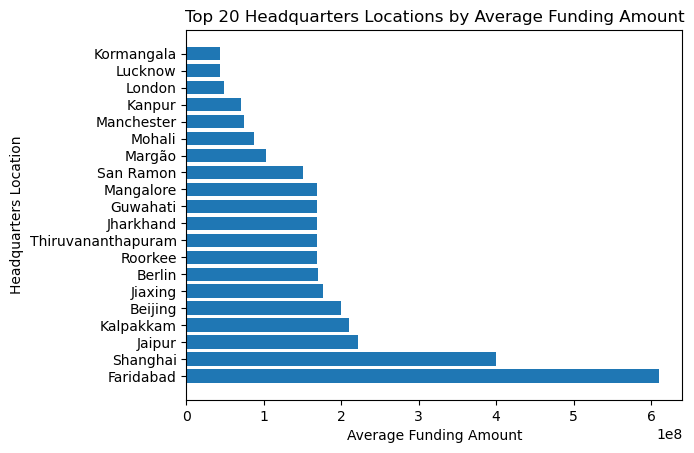

In [186]:
# Group the data by headquarters location and calculate the average funding amount
grouped = ind_st2.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the data by average funding amount in descending order
grouped = grouped.sort_values(ascending=False)

# Select the top 20 headquarters locations
top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
plt.barh(top_20.index, top_20.values)
plt.xlabel('Average Funding Amount')
plt.ylabel('Headquarters Location')
plt.title('Top 20 Headquarters Locations by Average Funding Amount')

# Display the plot
plt.show()


In [188]:
# save dataframe to a CSV file
ind_2018.to_csv('clean-startup-2018.csv',index_label='Date')
ind_2019.to_csv('clean-startup-2019.csv',index_label='Date')
ind_2020.to_csv('clean-startup-2020.csv',index_label='Date')
ind_2021.to_csv('clean-startup-2021.csv',index_label='Date')